# Moving Beyond Linearity

Linear models are relatively simple to describe and implement and have advantages over other approaches in terms of interpretation and inference. 
However, standard linear regression can have significant limitations in terms of predictive power. 
This is because the linearity assumption is almost always an approximation, and sometimes a poor one. 
In this notebook we relax the linearity assumption while still attempting to maintain as much interpretability as possible. 
We will examine a simple extension of linear model called polynomial regression. 
There are other, more sophisticated approaches such as splines, local regression, and generalized additive models but we will not discuss them.

* Polynomial regression extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power. For example, a cubic regression uses three variables, $X$, $X2$, and $X3$, as predictors. This approach provides a simple way to provide a nonlinear fit to data.

* Step functions cut the range of a variable into K distinct regions in order to produce a qualitative variable. This has the effect of fitting a piecewise constant function.



## Polynomial Regression

The standard way to extend linear regression to settings in which the relationship between the predictors and the response is nonlinear has been to replace the standard linear model as below,

$$y_i = \beta_0 + \beta_1x_i + \epsilon_i$$

with a polynomial function

$$y_i = \beta_0 + \beta_1x_i + \beta_2x^2_i + \beta_3x^3_i + . . + \beta_dx^d_i + \epsilon_i\  \quad\quad\quad - \quad 1$$

where $\epsilon_i$ is the error term. 
This approach is known as <i>polynomial regression</i>. 
For a large enough degree d, a polynomial regression allows us to produce an extremely non-linear curve. 
The coefficients in (1) can be easily estimated using least squares linear regression because this is just a standard linear model with predictors $x_i, x^2_i, x^3_i, . . , x^d_i$. 
It is unusual to use $d$ greater than 3 or 4 because for large values of $d$, 
the polynomial curve can become overly flexible and can take on some very strange shapes. 

The figure below demonstrates the polynomial regression curve fitted on wages data. 
It's a plot of <span style="color:#a5541a">wage</span> against <span style="color:#a5541a">age</span> for the <span style="color:#a5541a">wage</span> data set, which contains income and demographic information for males who reside in the central Atlantic region of the United States. 
We see the results of fitting a degree-4 polynomial using least squares (solid blue curve). 
Even though this is a linear regression model like any other, the individual coefficients are not of particular interest. 
Instead, we look at the entire fitted function across a grid of 62 values for <span style="color:#a5541a">age</span> from 18 to 80 in order to understand the relationship between <span style="color:#a5541a">age</span> and <span style="color:#a5541a">wage</span>.

<img src="../images/poly_reg.PNG" height=600 width=600>$$ Figure\ 1$$



The pair of dotted curves that accompany the fit are (2×) standard error curves. Let’s see how these arise. Imagine we have computed the fit at a particular value of <span style="color:#a5541a">age</span>, $x_0$:

$$\hat{f}(x_0) = \hat{\beta}_0 + \hat{\beta}_1x_0 + \hat{\beta}_2x^2_0 + \hat{\beta}_3x^3_0 + \hat{\beta}_4x^d_4. \quad\quad\quad -  \quad2$$

What is the variance of the fit, i.e. Var$\hat{f}(x_0)$? 
Least squares returns variance estimates for each of the fitted coefficients $\hat{beta}_j$, 
as well as the covariances between pairs of coefficient estimates. 
We can use these to compute the estimated variance of $\hat{f}(x_0)$. 
The estimated pointwise standard error of $\hat{f}(x_0)$ is the square-root of this variance. 
This computation is repeated at each reference point $x_0$, and we plot the fitted curve, 
as well as twice the standard error on either side of the fitted curve. 
We plot twice the standard error because, for normally distributed error terms, this quantity corresponds to an approximate $95%$ confidence interval.

Wages in the plot (above) looks like they are from two distinct populations. 
There appears to be a <i>high earners</i> group earning more than \$250,000 per annum, as well as a <i>low earners</i> group. 
We can treat <span style="color:#a5541a">wage</span> as a binary variable by splitting it into these two groups. Logistic regression can then be used to predict this binary response, using polynomial functions of <span style="color:#a5541a">age</span> as predictors. In other words, we fit the model

$$ Pr(y_i > 250|x_i) = \frac{exp(\beta_0+\beta_1x_i+\beta_2x^2_i+..+\beta_dx^d_i)}
{1+exp(\beta_0+\beta_1x_i+\beta_2x^2_i+..+\beta_dx^d_i)} \quad\quad  -  \quad 3$$

The result is shown in the right-hand panel of figure 1. 
The gray marks on the top and bottom of the panel indicate the ages of the high earners and the low earners. 
The solid blue curve indicates the fitted probabilities of being a high earner,
as a function of <span style="color:#a5541a">age</span>. 
Although the sample size for this data set is substantial (n = 3,000), there are only 79 high earners, 
which results in a high variance in the estimated coefficients and, consequently, wide confidence intervals.

### <span style="color:#4774bc">Fitting Polynomial Regression Model</span>

We will re-analyze the wage data considered in the examples. We begin by loading the ISLR library, which contains the data.

In [1]:
install.packages("ISLR")
library(ISLR)
attach(Wage)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


We first fit the model using the following command:

In [2]:
fit=lm(wage~poly(age, 4), data=Wage)
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287409,153.283015,0.000000e+00
"poly(age, 4)1",447.06785,39.9147851,11.200558,1.484604e-28
"poly(age, 4)2",-478.31581,39.9147851,-11.983424,2.355831e-32
"poly(age, 4)3",125.52169,39.9147851,3.144742,1.678622e-03
"poly(age, 4)4",-77.91118,39.9147851,-1.951938,5.103865e-02


This syntax fits a linear model, using the lm() function, in order to predict wage using a fourth-degree polynomial in <span style="color:#a5541a">age: poly(age,4)</span>. The <span style="color:#a5541a">poly()</span> command allows us to avoid having to write out a long formula with powers of <span style="color:#a5541a">age</span>. The function returns a matrix whose columns are a basis of <i>orthogonal polynomials</i>, which essentially means that each column is a linear combination of the variables <span style="color:#a5541a">age</span>, <span style="color:#a5541a">age^2</span>, <span style="color:#a5541a">age^3</span> and <span style="color:#a5541a">age^4</span>.

However, we can also use <span style="color:#a5541a">poly()</span> to obtain <span style="color:#a5541a">age</span>, <span style="color:#a5541a">age^2</span>, <span style="color:#a5541a">age^3</span> and <span style="color:#a5541a">age^4</span>
directly, if we prefer. We can do this by using the raw=TRUE argument to the <span style="color:#a5541a">poly()</span> function. Later we see that this does not affect the model in a meaningful way—though the choice of basis clearly affects the coefficient
estimates, it does not affect the fitted values obtained.

In [3]:
fit2=lm(wage~poly(age, 4, raw=T), data=Wage)
coef(summary(fit2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
"poly(age, 4, raw = T)1",2.124552e+01,5.886748e+00,3.609042,0.0003123618
"poly(age, 4, raw = T)2",-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
"poly(age, 4, raw = T)3",6.810688e-03,3.065931e-03,2.221409,0.0263977518
"poly(age, 4, raw = T)4",-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


There are several other equivalent ways of fitting this model, which showcase the flexibility of the formula language in R. For example...

In [4]:
fit2a=lm(wage~age+I(age^2)+I(age^3)+I(age^4), data=Wage)
coef(fit2a)

(Intercept)           age      I(age^2)      I(age^3)      I(age^4) 
-1.841542e+02  2.124552e+01 -5.638593e-01  6.810688e-03 -3.203830e-05

This simply creates the polynomial basis functions on the fly, taking care to protect terms like <span style="color:#a5541a">age^2</span> via the wrapper function I() (the ^ symbol has a special meaning in formulas).

In [5]:
fit2b=lm(wage~cbind(age, age^2, age^3, age^4), data=Wage)

This does the same more compactly, using the <span style="color:#a5541a">cbind()</span> function for building a matrix from a collection of vectors. Any function call such as <span style="color:#a5541a">cbind()</span> inside a formula also serves as a wrapper. 

We now create a grid of values for <span style="color:#a5541a">age</span> at which we want predictions, and then call the generic <span style="color:#a5541a">predict()</span> function, specifying that we want standard errors as well.

In [6]:
agelims=range(age)
age.grid=seq(from=agelims[1], to=agelims[2])
preds=predict(fit, newdata=list(age=age.grid), se=TRUE)
se.bands=cbind(preds$fit+2*preds$se.fit, preds$fit-2*preds$se.fit)

Finally, we plot the data and add the fit from the degree-4 polynomial...

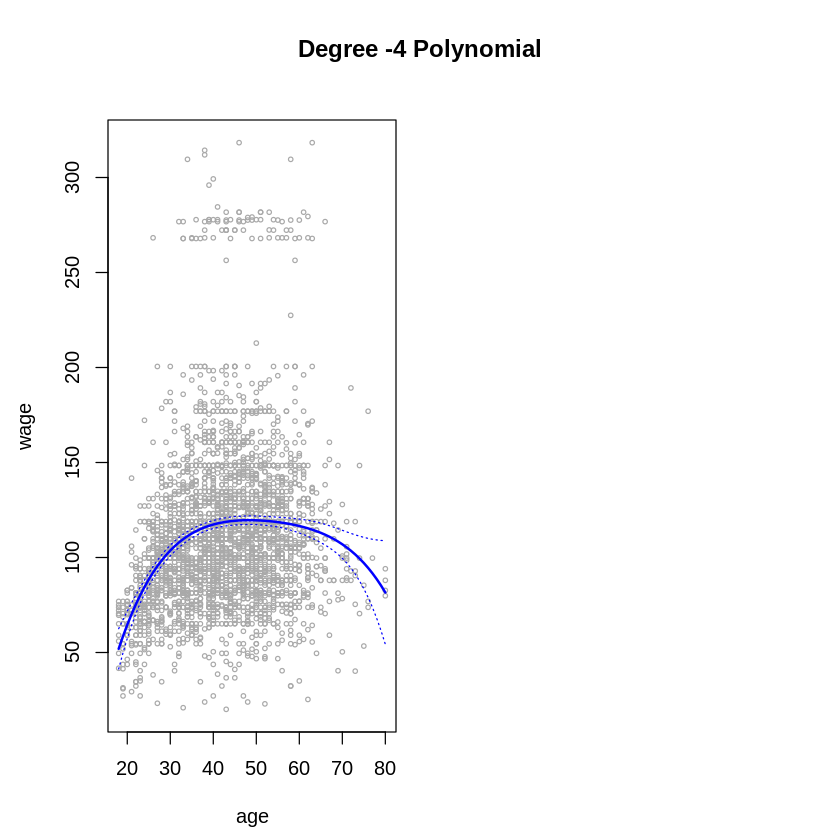

In [7]:
par(mfrow=c(1,2), mar=c(4.5, 4.5, 1, 1), oma=c(0,0,4,0))
plot(age, wage, xlim=agelims, cex=.5, col="darkgrey")
title(" Degree -4 Polynomial ", outer =T)
lines(age.grid, preds$fit, lwd=2, col="blue")
matlines(age.grid, se.bands, lwd=1, col="blue", lty=3)

Here the <span style="color:#a5541a">mar</span> and <span style="color:#a5541a">oma</span> arguments to <span style="color:#a5541a">par()</span> allow us to control the margins of the plot, and the <span style="color:#a5541a">title()</span> function creates a figure title that spans both subplots.

We mentioned earlier that whether or not an orthogonal set of basis functions is produced in the <span style="color:#a5541a">poly()</span> function will not affect the model obtained in a meaningful way. What do we mean by this? The fitted values obtained in either case are identical:

In [8]:
preds2 = predict(fit2, newdata=list(age=age.grid), se=TRUE)
max(abs(preds$fit - preds2$fit))

[1] 1.641354e-12

#### <span style="color:#4774bc"> Degree of the polynomial to use</span>: 

In performing a polynomial regression we must decide on the degree of the polynomial to use. 
One way to do this is by using hypothesis tests. 
We now fit models ranging from linear to a degree-5 polynomial and seek to determine the simplest model which is sufficient to explain the relationship between wage and age. 

We use the <span style="color:#a5541a">anova()</span> function, 
which performs an analysis of variance (ANOVA, using an F-test) in order to test the null analysis that a model $M_1$ is sufficient to explain the data against the alternative hypothesis that a more complex model $M_2$ is required. 
In order to use the <span style="color:#a5541a">anova()</span> function, $M_1$ and $M_2$ must be nested models: the predictors in $M_1$ must be a subset of the predictors in $M_2$. 
In this case, we fit five different models and sequentially and compare the simpler model to the more complex model.

In [9]:
fit.1= lm(wage~age , data=Wage)
fit.2= lm(wage~poly(age, 2), data=Wage)
fit.3= lm(wage~poly(age, 3), data=Wage)
fit.4= lm(wage~poly(age, 4), data=Wage)
fit.5= lm(wage~poly(age, 5), data=Wage)
anova(fit.1, fit.2, fit.3, fit.4, fit.5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2998,5022216,NA,NA,NA,NA
2997,4793430,1,228786.010,143.5931074,2.367734e-32
2996,4777674,1,15755.694,9.8887559,1.679213e-03
2995,4771604,1,6070.152,3.8098134,5.104623e-02
2994,4770322,1,1282.563,0.8049758,3.696820e-01


The p-value comparing the linear <span style="color:#a5541a">$Model\ 1$</span> to the quadratic <span style="color:#a5541a">$Model\ 2$</span> is essentially zero $(<10^{-15})$, indicating that a linear fit is not sufficient. Similarly the p-value comparing the quadratic <span style="color:#a5541a">$Model\ 2$</span> to the cubic <span style="color:#a5541a">$Model\ 3$</span> is very low (0.0017), so the quadratic fit is also insufficient. The p-value
comparing the cubic and degree-4 polynomials, <span style="color:#a5541a">$Model\ 3$</span> and <span style="color:#a5541a">$Model\ 4$</span>, is approximately 5% while the degree-5 polynomial <span style="color:#a5541a">$Model\ 5$</span> seems unnecessary because its p-value is 0.37. Hence, either a cubic or a quartic polynomial
appear to provide a reasonable fit to the data, but lower- or higher-order models are not justified. In this case, instead of using the anova() function, we could have obtained these p-values more succinctly by exploiting the fact that poly() creates
orthogonal polynomials.

In [10]:
coef(summary(fit.5))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287647,153.2780243,0.000000e+00
"poly(age, 5)1",447.06785,39.9160847,11.2001930,1.491111e-28
"poly(age, 5)2",-478.31581,39.9160847,-11.9830341,2.367734e-32
"poly(age, 5)3",125.52169,39.9160847,3.1446392,1.679213e-03
"poly(age, 5)4",-77.91118,39.9160847,-1.9518743,5.104623e-02
"poly(age, 5)5",-35.81289,39.9160847,-0.8972045,3.696820e-01


Notice that the p-values are the same, and in fact the square of the t-statistics are equal to the F-statistics from the <span style="color:#a5541a">anova()</span> function. For example...

In [11]:
(-11.983)^2

[1] 143.5923

However, the ANOVA method works whether or not we used orthogonal polynomials; it also works when we have other terms in the model as well. For example, we can use <span style="color:#a5541a">anova()</span> to compare these three models:

fit.1 = lm(wage~education + age, data=Wage)
fit.2 = lm(wage~education + poly(age, 2), data=Wage)
fit.3 = lm(wage~education + poly(age, 3), data=Wage)
anova(fit.1, fit.2, fit.3)

As an alternative to using hypothesis tests and ANOVA, we could choose the polynomial degree using cross-validation. Next we consider the task of predicting whether an individual earns more than \$250,000 per year. We proceed much as before, except that first we create the appropriate response vector and then apply the <span style="color:#a5541a">glm()</span> function using <span style="color:#a5541a">family="binomial"</span> in order to fit a polynomial logistic regression model.

In [12]:
fit=glm(I(wage>250)~poly(age, 4), data=Wage, family = binomial)

Note that we again use the wrapper <span style="color:#a5541a">I()</span> to create this binary response variable on the fly. The expression <span style="color:#a5541a">wage>250</span> evaluates to a logical variable containing <span style="color:#a5541a">TRUEs</span> and <span style="color:#a5541a">FALSEs</span>, which glm() coerces to binary by setting the
<span style="color:#a5541a">TRUEs</span> to 1 and the <span style="color:#a5541a">FALSEs</span> to 0.

Once again, we make predictions using the <span style="color:#a5541a">predict()</span> function.

In [13]:
preds=predict(fit, newdata = list(age=age.grid), se=T)

However, calculating the confidence intervals is slightly more involved than in the linear regression case. The default prediction type for a glm() model is type="link", which is what we use here. This means we get predictions for the logit; that is, we have fit a model of the form

$$log\bigg( \frac{Pr(Y\ =\ 1\mid X)}{1-Pr(Y\ =\ 1\mid X)}\bigg) = X\beta$$

and the predictions given are of the form $X \hat{\beta}$. The standard errors given are also of this form. In order to obtain confidence intervals for $Pr(Y\ =\ 1\mid X), we use the transformation

$$ Pr(Y=1\mid X) = \frac{exp(X\beta)}{1+exp(X\beta)}$$

In [14]:
pfit = exp(preds$fit)/(1+exp(preds$fit))
se.bands.logit = cbind(preds$fit + 2*preds$se.fit ,preds$fit - 2*preds$se.fit)
se.bands = exp(se.bands.logit)/(1+exp(se.bands.logit))

Note that we could have directly computed the probabilities by selecting the <span style="color:#a5541a">type="response"</span> option in the <span style="color:#a5541a">predict()</span> function.

In [15]:
preds=predict(fit, newdata = list(age=age.grid), type="response", se=T)

However, the corresponding confidence intervals would not have been sensible because we would end up with negative probabilities!

Finally, the right-hand plot from figure 1 is made as follows:

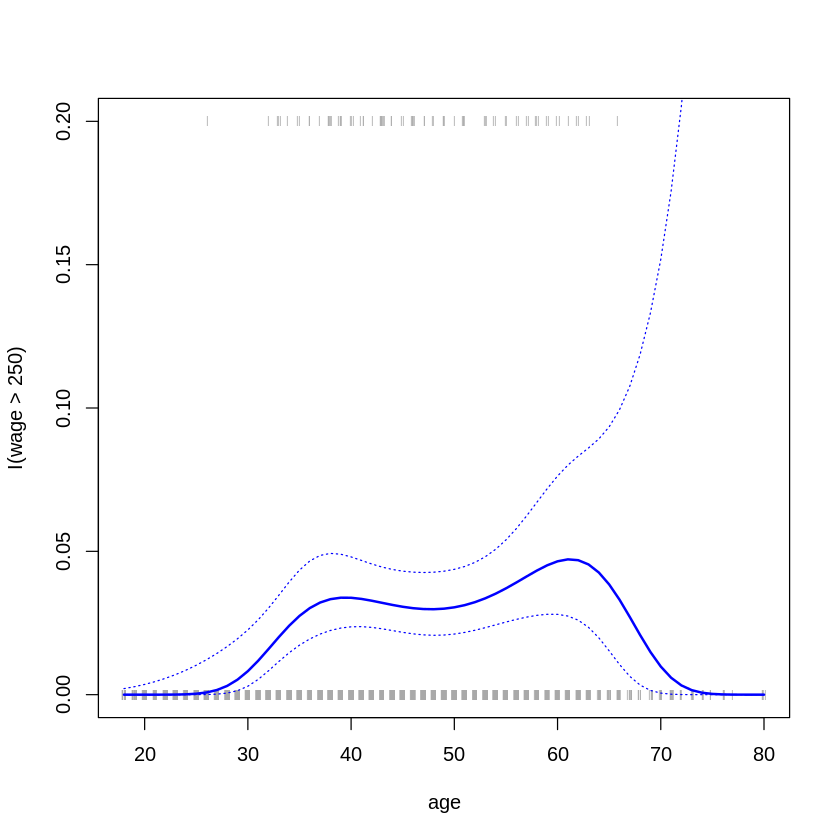

In [16]:
plot(age, I(wage >250), xlim=agelims, type ="n", ylim=c(0, .2))
points(jitter(age) ,I((wage>250)/5), cex =.5, pch ="|", col ="darkgrey")
lines(age.grid, pfit, lwd=2, col ="blue")
matlines(age.grid, se.bands, lwd=1, col="blue", lty =3)

We have drawn the age values corresponding to the observations with wage values above 250 as gray marks 
on the top of the plot, and those with wage values below 250 are shown as gray marks on the bottom of the plot. 
We used the `jitter()` function to jitter the age values a bit so that observations `jitter()` 
with the same age value do not cover each other up. 
This is often called a rug plot.

# Save your notebook